# 한국 복지 패널 데이터 분석

- 한국 복지 패널은 빈곤층, 근로빈곤층, 차상중하위 계층 등 다양한 계층의 규모 및 생활 실태 변화 등을 추적하여 파악함으로써 복지 정책 수립에 기어를 하고 있다.
- https://www.koweps.re.kr:442/main.do

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 데이터를 읽어온다.

In [2]:
df = pd.read_excel('data/dataset2017.xlsx')
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


- h12_g3 : 성별, 남자(1), 여자(2), 모름/무응답(9)
- h12_g4 : 태어난 년도, 1900-2014, 모름/무응답(9999)
- h12_g10 : 혼인상태, 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼(5, 18세 이상, 미혼모 포함), 기타(6, 사망 등), 해당없음(0, 18세미만), 모름/무응답(9)
- h12_g11 : 종교유무, 있음(1), 없음(2), 모름/무응답(9)
- h12_eco9 : 직종, 직종코드표를 참고, 모름/무응답(9999)
- p1202_8aq1 : 일한달의 월 평균 임금
- h12_reg7 : 7개 권역별 지역 구분. 서울(1), 수도권(2, 인천/경기), 부산/울산/경남(3), 대구/경북(4), 대전/충남(5), 강원/충북(6), 광주/전남/전북/제주도(7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


### 사용하고자 하는 컬럼만 추출한다.

In [19]:
df1 = df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9',
          'p1202_8aq1', 'h12_reg7']]
df1.columns = ['성별', '출생년도', '혼인상태', '종교', '직종', '월평균임금',
               '지역']
df1

,성별,출생년도,혼인상태,종교,직종,월평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 조사 대상에 대한 성별 분포

In [20]:
# 성별 컬럼만 추출한다.
df2 = df1[['성별']]
df2

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [21]:
# 결측치를 확인한다.
df2['성별'].isna().sum()

0

In [22]:
# 이상치 확인
df2['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [23]:
# 성별 값을 남자, 여자로 변경한다.
a1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(a1)
df2

/var/folders/gr/n8_lnq3n4bq1z2j7w3hrtg_40000gn/T/ipykernel_4759/834034527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(a1)


,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


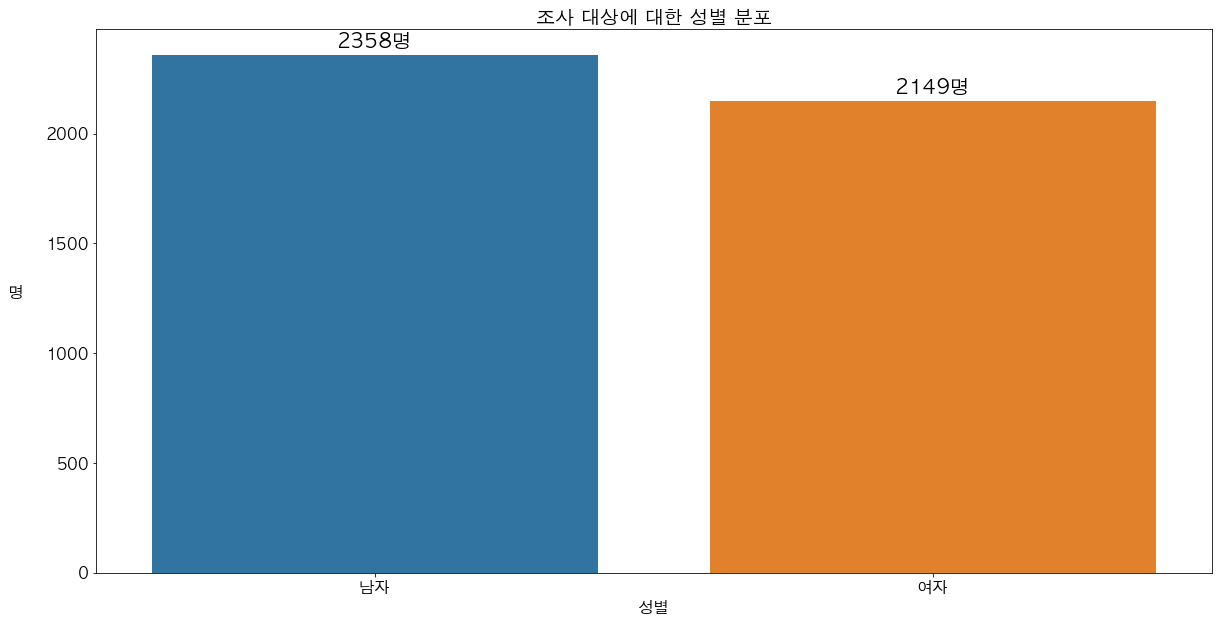

In [41]:
sns.countplot(data=df2, x='성별')

plt.title('조사 대상에 대한 성별 분포')

plt.ylabel('명', rotation=0, labelpad=30)

# 저장되어 있는 값의 수를 구한다.
a100 = df2['성별'].value_counts()

for idx, value in enumerate(a100) :
    plt.text(idx, value + 30, f'{value}명', horizontalalignment='center',
            fontsize = 20)

plt.show()

### 성별에 따른 월급 차이 분석

In [25]:
df2 = df1[['성별', '월평균임금']]
df2

,성별,월평균임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [26]:
# 성별 데이터 변환
d1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(d1)
df2

/var/folders/gr/n8_lnq3n4bq1z2j7w3hrtg_40000gn/T/ipykernel_4759/1088041929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(d1)


,성별,월평균임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [27]:
# 결측치 확인
df2.isna().sum()

성별           0
월평균임금    10915
dtype: int64

In [28]:
# 이상치 확인
df2['월평균임금'].agg(['min', 'max'])

min       0.0
max    1874.0
Name: 월평균임금, dtype: float64

In [29]:
# 결측치인 로우는 모두 제거한다.
df2.dropna(inplace=True)
df2.isna().sum()

/Users/hyojinlee/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


성별       0
월평균임금    0
dtype: int64

In [30]:
# 성별에 따른 월평균 임금
a1 = df2.groupby('성별', as_index=False).mean()
a1

,성별,월평균임금
0,남자,333.280785
1,여자,175.293108


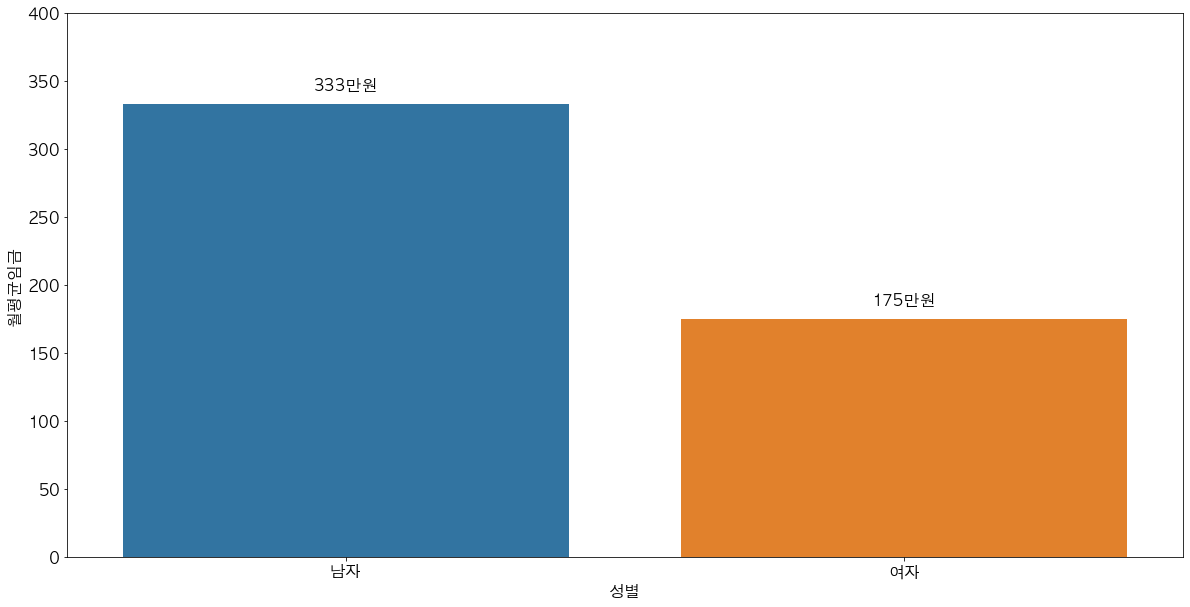

In [35]:
sns.barplot(data=a1, x='성별', y='월평균임금')

for idx, value in enumerate(a1['월평균임금']) :
    plt.text(idx, value + 10, f'{int(value)}만원', horizontalalignment='center')

plt.ylim(0, 400)    

plt.show()

### 나이의 변화에 따른 월평균 급여 변화량

### 연령대별 급여 평균을 비교
